In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import datasets

In [2]:
# CHAMAU

chamau_lag = pd.read_csv("../datasets/Chamau_2014-2024_clean_newlag.csv")
chamau_daily = pd.read_csv("../datasets/Chamau_Daily_2014-2024_newlag.csv")

chamau_A = chamau_lag[chamau_lag["Parcel"] == "A"].copy()
chamau_B = chamau_lag[chamau_lag["Parcel"] == "B"].copy()

chamau_daily_A = chamau_daily[chamau_daily["Parcel"] == "A"]
chamau_daily_B = chamau_daily[chamau_daily["Parcel"] == "B"]

In [3]:
chamau_daily_A.head()

,Parcel,Date,N2O_Flux,NEE,GPP,RECO,SolarRadiation,AirTemp,VPD,SoilWater_5cm,SoilWater_15cm,SoilTemp_4cm,SoilTemp_15cm,Precipitation,Mowing,FertilizerOrganic,FertilizerMineral,Grazing,SoilCultivation,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,DaysSince_Grazing,DaysSince_SoilCultivation,WD,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilTemp_4cm_lag1d,SoilTemp_4cm_lag3d,SoilTemp_4cm_lag5d,SoilTemp_4cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,NEE_roll3d_mean,NEE_roll3d_sum,NEE_roll5d_mean,NEE_roll5d_sum,NEE_roll7d_mean,NEE_roll7d_sum,GPP_roll3d_mean,GPP_roll3d_sum,GPP_roll5d_mean,GPP_roll5d_sum,GPP_roll7d_mean,GPP_roll7d_sum,RECO_roll3d_mean,RECO_roll3d_sum,RECO_roll5d_mean,RECO_roll5d_sum,RECO_roll7d_mean,RECO_roll7d_sum,SolarRadiation_roll3d_mean,SolarRadiation_roll3d_sum,SolarRadiation_roll5d_mean,SolarRadiation_roll5d_sum,SolarRadiation_roll7d_mean,SolarRadiation_roll7d_sum,AirTemp_roll3d_mean,AirTemp_roll3d_sum,AirTemp_roll5d_mean,AirTemp_roll5d_sum,AirTemp_roll7d_mean,AirTemp_roll7d_sum,VPD_roll3d_mean,VPD_roll3d_sum,VPD_roll5d_mean,VPD_roll5d_sum,VPD_roll7d_mean,VPD_roll7d_sum,SoilWater_5cm_roll3d_mean,SoilWater_5cm_roll3d_sum,SoilWater_5cm_roll5d_mean,SoilWater_5cm_roll5d_sum,SoilWater_5cm_roll7d_mean,SoilWater_5cm_roll7d_sum,SoilWater_15cm_roll3d_mean,SoilWater_15cm_roll3d_sum,SoilWater_15cm_roll5d_mean,SoilWater_15cm_roll5d_sum,SoilWater_15cm_roll7d_mean,SoilWater_15cm_roll7d_sum,SoilTemp_4cm_roll3d_mean,SoilTemp_4cm_roll3d_sum,SoilTemp_4cm_roll5d_mean,SoilTemp_4cm_roll5d_sum,SoilTemp_4cm_roll7d_mean,SoilTemp_4cm_roll7d_sum,SoilTemp_15cm_roll3d_mean,SoilTemp_15cm_roll3d_sum,SoilTemp_15cm_roll5d_mean,SoilTemp_15cm_roll5d_sum,SoilTemp_15cm_roll7d_mean,SoilTemp_15cm_roll7d_sum,Precipitation_roll3d_mean,Precipitation_roll3d_sum,Precipitation_roll5d_mean,Precipitation_roll5d_sum,Precipitation_roll7d_mean,Precipitation_roll7d_sum,year,month,N2O_Flux_ln,Fertilizer_N_kg_ha,Fertilizer_N_kg_ha_expHL3d,Fertilizer_N_kg_ha_expHL7d,Fertilizer_N_kg_ha_expHL14d
0,A,2014-01-01,0.113504,-0.431513,1.855290,1.423777,57.185453,-0.038861,0.030485,58.517817,47.376410,1.706039,2.582958,0.1317,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,154.745237,-0.185901,-1.179539,0.885267,1.075549,1.468249,2.476004,0.265522,0.088402,1.282348,1.296464,1.150789,1.163950,29.894050,68.640794,3.717586,2.109514,-1.873985,2.290582,-1.027617,0.666818,0.000971,0.028887,0.000185,0.000098,58.757350,59.206821,59.213039,58.268536,47.525087,47.877036,47.893804,47.259720,2.130320,2.808879,2.858128,2.398807,3.056710,3.295464,3.535069,3.225450,0.0000,0.2634,0.0000,0.131700,-0.333817,-1.001450,-0.129998,-0.649988,-0.119184,-0.834286,1.608729,4.826187,1.362096,6.810479,1.341754,9.392279,1.274912,3.824737,1.232098,6.160491,1.222570,8.557992,37.700242,113.100726,31.899897,159.499485,23.965410,167.757868,-0.310698,-0.932095,-0.462284,-2.311418,0.016183,0.113281,0.010012,0.030035,0.006072,0.030360,0.004360,0.030523,58.921062,176.763186,59.023890,295.119449,58.976209,412.833466,47.706382,143.119146,47.759871,238.799354,47.694466,333.861262,2.649547,7.948640,2.596330,12.981650,2.692539,18.847776,3.307629,9.922886,3.305127,16.525633,3.366527,23.565689,0.0878,0.2634,0.34242,1.7121,2.765700,19.359901,2014,1,0.107512,0.0,0.0,0.0,0.0
1,A,2014-01-02,0.576500,1.113332,0.384247,1.497579,8.145214,-0.072063,0.000128,58.505171,47.334073,2.047250,2.686911,0.5268,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,146.699036,-0.4315

In [4]:
# AESCHI

aeschi_lag = pd.read_csv("../datasets/Aeschi_2019-20_clean.csv")
aeschi_daily = pd.read_csv("../datasets/Aeschi_Daily_2019-20.csv")

In [5]:
# OENSINGEN

oensingen_lag_1 = pd.read_csv("../datasets/Oensingen_2018-19_clean.csv")
oensingen_daily_1 = pd.read_csv("../datasets/Oensingen_Daily_2018-19_clean.csv")

oensingen_lag_2 = pd.read_csv("../datasets/Oensingen_2021-23_clean.csv")
oensingen_daily_2 = pd.read_csv("../datasets/Oensingen_Daily_2021-23_clean.csv")

In [6]:
# TANIKON

tanikon_lag = pd.read_csv("../datasets/Tanikon_2023-25_clean.csv")
tanikon_daily = pd.read_csv("../datasets/Tanikon_Daily_2023-25_clean.csv")

In [7]:
def harmonize_and_normalize(datasets, target_col="N2O_Flux_ln"):
    """
    Harmonize column names (depths) across sites,
    normalize predictors within site, and merge into one dataset.
    """

    # --- build harmonization mapping ---
    harmonization_map = {}
    for depth_old, depth_new in [
        ("SoilTemp_4cm", "SoilTemp_shallow"),
        ("SoilTemp_5cm", "SoilTemp_shallow"),
        ("SoilTemp_15cm", "SoilTemp_mid"),
        ("SoilTemp_30cm", "SoilTemp_deep"),
        ("SoilWater_5cm", "SoilWater_shallow"),
        ("SoilWater_15cm", "SoilWater_mid"),
        ("SoilWater_30cm", "SoilWater_deep"),
    ]:
        harmonization_map[depth_old] = depth_new
        for lag in ["_lag1d", "_lag3d", "_lag5d", "_lag7d"]:
            harmonization_map[depth_old + lag] = depth_new + lag

    normalized_dfs = []

    # --- apply harmonization + normalization per site ---
    for site_name, df in datasets.items():
        df = df.rename(columns=harmonization_map).copy()
        df["Site"] = site_name

        # numeric predictors except target
        numeric_cols = df.select_dtypes(include="number").columns
        numeric_cols = [c for c in numeric_cols if c != target_col]

        means = df[numeric_cols].mean()
        stds = df[numeric_cols].std(ddof=0)

        for c in numeric_cols:
            if stds[c] > 1e-8:
                df[c] = (df[c] - means[c]) / stds[c]
            else:
                df[c] = 0.0

        normalized_dfs.append(df)

    # unify schema (adds NaNs where some columns missing)
    combined_df = pd.concat(normalized_dfs, ignore_index=True)
    return combined_df


# --- Run it ---
combined_df = harmonize_and_normalize({
    "Chamau A": chamau_A,
    "Chamau B": chamau_B,
    "Aeschi": aeschi_lag,
    "Oensingen 1": oensingen_lag_1,
    "Oensingen 2": oensingen_lag_2,
    "Tanikon": tanikon_lag
})
print("✅ Combined shape:", combined_df.shape)
print("Common depth columns:", [c for c in combined_df.columns if "Soil" in c])


✅ Combined shape: (50638, 218)
Common depth columns: ['SoilWater_shallow', 'SoilWater_mid', 'SoilTemp_shallow', 'SoilTemp_mid', 'SoilCultivation', 'SoilWater_5cm_lag1d_daily', 'SoilWater_5cm_lag3d_daily', 'SoilWater_5cm_lag5d_daily', 'SoilWater_5cm_lag7d_daily', 'SoilWater_15cm_lag1d_daily', 'SoilWater_15cm_lag3d_daily', 'SoilWater_15cm_lag5d_daily', 'SoilWater_15cm_lag7d_daily', 'SoilTemp_4cm_lag1d_daily', 'SoilTemp_4cm_lag3d_daily', 'SoilTemp_4cm_lag5d_daily', 'SoilTemp_4cm_lag7d_daily', 'SoilTemp_15cm_lag1d_daily', 'SoilTemp_15cm_lag3d_daily', 'SoilTemp_15cm_lag5d_daily', 'SoilTemp_15cm_lag7d_daily', 'SoilWater_5cm_roll3d_mean', 'SoilWater_5cm_roll3d_sum', 'SoilWater_5cm_roll5d_mean', 'SoilWater_5cm_roll5d_sum', 'SoilWater_5cm_roll7d_mean', 'SoilWater_5cm_roll7d_sum', 'SoilWater_15cm_roll3d_mean', 'SoilWater_15cm_roll3d_sum', 'SoilWater_15cm_roll5d_mean', 'SoilWater_15cm_roll5d_sum', 'SoilWater_15cm_roll7d_mean', 'SoilWater_15cm_roll7d_sum', 'SoilTemp_4cm_roll3d_mean', 'SoilTemp_4cm

FIT RF PER DATASET

In [8]:
# datasets = {
#     "Chamau Daily": chamau_daily,
#     "Chamau A Daily": chamau_daily_A,
#     "Chamau B Daily": chamau_daily_B,
#     "Aeschi Daily": aeschi_daily,
#     "Oensingen Daily 1": oensingen_daily_1,
#     "Oensingen Daily 2": oensingen_daily_2
# }

datasets = {
    "Chamau": chamau_lag,
    # "Chamau A": chamau_A,
    # "Chamau B": chamau_B,
    # "Aeschi": aeschi_lag,
    # "Oensingen 1": oensingen_lag_1,
    # "Oensingen 2": oensingen_lag_2,
    # "Tanikon": tanikon_lag
    # "Combined" : combined_df
}

In [9]:
for name, df in datasets.items():
    print(f"\n{name} — {len(df.columns)} columns:")
    print(df.columns.tolist())



Chamau — 158 columns:
['Timestamp', 'N2O_Flux', 'NEE', 'GPP', 'RECO', 'SolarRadiation', 'AirTemp', 'Precipitation', 'VPD', 'SoilWater_5cm', 'SoilWater_15cm', 'SoilTemp_4cm', 'SoilTemp_15cm', 'WD', 'year', 'month', 'hour', 'day', 'Parcel', 'Mowing', 'FertilizerOrganic', 'FertilizerMineral', 'Grazing', 'SoilCultivation', 'NEE_lag1d_daily', 'NEE_lag3d_daily', 'NEE_lag5d_daily', 'NEE_lag7d_daily', 'GPP_lag1d_daily', 'GPP_lag3d_daily', 'GPP_lag5d_daily', 'GPP_lag7d_daily', 'RECO_lag1d_daily', 'RECO_lag3d_daily', 'RECO_lag5d_daily', 'RECO_lag7d_daily', 'SolarRadiation_lag1d_daily', 'SolarRadiation_lag3d_daily', 'SolarRadiation_lag5d_daily', 'SolarRadiation_lag7d_daily', 'AirTemp_lag1d_daily', 'AirTemp_lag3d_daily', 'AirTemp_lag5d_daily', 'AirTemp_lag7d_daily', 'VPD_lag1d_daily', 'VPD_lag3d_daily', 'VPD_lag5d_daily', 'VPD_lag7d_daily', 'SoilWater_5cm_lag1d_daily', 'SoilWater_5cm_lag3d_daily', 'SoilWater_5cm_lag5d_daily', 'SoilWater_5cm_lag7d_daily', 'SoilWater_15cm_lag1d_daily', 'SoilWater_1

In [4]:
predictor_sets = {
    "base": [
        # Meteorology
        "Precipitation", "SolarRadiation", "AirTemp", "VPD",
        # Soil moisture and temperature (all depths observed across sites)
        "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
        "SoilTemp_4cm", "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",

        # # Soil moisture and temperature (harmonized depths)
        # "SoilWater_shallow", "SoilWater_mid", "SoilWater_deep",
        # "SoilTemp_shallow", "SoilTemp_mid", "SoilTemp_deep",
        
        # Ecosystem fluxes
        "NEE", "GPP", "RECO",
        # Management
        "Mowing", "FertilizerOrganic", "FertilizerMineral",
        "Grazing", "SoilCultivation",
        # Optional temporal descriptors
        "month", "day", "hour",

        "Fertilizer_N_kg_ha"
    ],

    # "lag": [
    #     # Current values
    #     "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    #     "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    #     "SoilTemp_4cm", "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    #     "NEE", "GPP", "RECO",

    #     # Lagged meteorology and soil variables
    #     "Precipitation_lag1d", "Precipitation_lag3d", "Precipitation_lag5d", "Precipitation_lag7d",
    #     "SolarRadiation_lag1d", "SolarRadiation_lag3d", "SolarRadiation_lag5d", "SolarRadiation_lag7d",
    #     "AirTemp_lag1d", "AirTemp_lag3d", "AirTemp_lag5d", "AirTemp_lag7d",
    #     "VPD_lag1d", "VPD_lag3d", "VPD_lag5d", "VPD_lag7d",

    #     # Soil moisture lags
    #     "SoilWater_5cm_lag1d", "SoilWater_5cm_lag3d", "SoilWater_5cm_lag5d", "SoilWater_5cm_lag7d",
    #     "SoilWater_15cm_lag1d", "SoilWater_15cm_lag3d", "SoilWater_15cm_lag5d", "SoilWater_15cm_lag7d",
    #     "SoilWater_30cm_lag1d", "SoilWater_30cm_lag3d", "SoilWater_30cm_lag5d", "SoilWater_30cm_lag7d",

    #     # Soil temperature lags
    #     "SoilTemp_4cm_lag1d", "SoilTemp_4cm_lag3d", "SoilTemp_4cm_lag5d", "SoilTemp_4cm_lag7d",
    #     "SoilTemp_5cm_lag1d", "SoilTemp_5cm_lag3d", "SoilTemp_5cm_lag5d", "SoilTemp_5cm_lag7d",
    #     "SoilTemp_15cm_lag1d", "SoilTemp_15cm_lag3d", "SoilTemp_15cm_lag5d", "SoilTemp_15cm_lag7d",
    #     "SoilTemp_30cm_lag1d", "SoilTemp_30cm_lag3d", "SoilTemp_30cm_lag5d", "SoilTemp_30cm_lag7d",

    #     # Flux lags
    #     "NEE_lag1d", "NEE_lag3d", "NEE_lag5d", "NEE_lag7d",
    #     "GPP_lag1d", "GPP_lag3d", "GPP_lag5d", "GPP_lag7d",
    #     "RECO_lag1d", "RECO_lag3d", "RECO_lag5d", "RECO_lag7d",

    #     # Management and days since management
    #     "Mowing", "FertilizerOrganic", "FertilizerMineral", "Grazing", "SoilCultivation",
    #     "DaysSince_Mowing", "DaysSince_FertilizerOrganic", "DaysSince_FertilizerMineral",
    #     "DaysSince_Grazing", "DaysSince_SoilCultivation",
    #     # Temporal features
    #     "month", "day", "hour",

    #     "Fertilizer_N_kg_ha"
    # ],

    "augmented_lag" : [
    
        # ============================================================
        # Current (hourly) environmental + flux state (no lags)
        # ============================================================
        "Precipitation", "SolarRadiation", "AirTemp", "VPD",
        "SoilWater_5cm", "SoilWater_15cm",
        "SoilTemp_4cm", "SoilTemp_15cm",
        "NEE", "GPP", "RECO",
    
        # # ============================================================
        # # ---- DAILY LAGS (Exact previous calendar days) ----
        # # e.g., NEE_lag1d_daily = mean(NEE of yesterday)
        # # ============================================================
        # # 1, 3, 5, 7 day lags
        "NEE_lag1d_daily", "NEE_lag3d_daily", "NEE_lag5d_daily", "NEE_lag7d_daily",
        "GPP_lag1d_daily", "GPP_lag3d_daily", "GPP_lag5d_daily", "GPP_lag7d_daily",
        "RECO_lag1d_daily", "RECO_lag3d_daily", "RECO_lag5d_daily", "RECO_lag7d_daily",
        "SolarRadiation_lag1d_daily", "SolarRadiation_lag3d_daily", "SolarRadiation_lag5d_daily", "SolarRadiation_lag7d_daily",
        "AirTemp_lag1d_daily", "AirTemp_lag3d_daily", "AirTemp_lag5d_daily", "AirTemp_lag7d_daily",
        "VPD_lag1d_daily", "VPD_lag3d_daily", "VPD_lag5d_daily", "VPD_lag7d_daily",
        "SoilWater_5cm_lag1d_daily", "SoilWater_5cm_lag3d_daily", "SoilWater_5cm_lag5d_daily", "SoilWater_5cm_lag7d_daily",
        "SoilWater_15cm_lag1d_daily", "SoilWater_15cm_lag3d_daily", "SoilWater_15cm_lag5d_daily", "SoilWater_15cm_lag7d_daily",
        "SoilTemp_4cm_lag1d_daily", "SoilTemp_4cm_lag3d_daily", "SoilTemp_4cm_lag5d_daily", "SoilTemp_4cm_lag7d_daily",
        "SoilTemp_15cm_lag1d_daily", "SoilTemp_15cm_lag3d_daily", "SoilTemp_15cm_lag5d_daily", "SoilTemp_15cm_lag7d_daily",
        "Precipitation_lag1d_daily", "Precipitation_lag3d_daily", "Precipitation_lag5d_daily", "Precipitation_lag7d_daily",

        "NEE_lag1d", "NEE_lag3d", "NEE_lag5d", "NEE_lag7d",
        "GPP_lag1d", "GPP_lag3d", "GPP_lag5d", "GPP_lag7d",
        "RECO_lag1d", "RECO_lag3d", "RECO_lag5d", "RECO_lag7d",
        "SolarRadiation_lag1d", "SolarRadiation_lag3d", "SolarRadiation_lag5d", "SolarRadiation_lag7d",
        "AirTemp_lag1d", "AirTemp_lag3d", "AirTemp_lag5d", "AirTemp_lag7d",
        "VPD_lag1d", "VPD_lag3d", "VPD_lag5d", "VPD_lag7d",
        "SoilWater_5cm_lag1d", "SoilWater_5cm_lag3d", "SoilWater_5cm_lag5d", "SoilWater_5cm_lag7d",
        "SoilWater_15cm_lag1d", "SoilWater_15cm_lag3d", "SoilWater_15cm_lag5d", "SoilWater_15cm_lag7d",
        "SoilTemp_4cm_lag1d", "SoilTemp_4cm_lag3d", "SoilTemp_4cm_lag5d", "SoilTemp_4cm_lag7d",
        "SoilTemp_15cm_lag1d", "SoilTemp_15cm_lag3d", "SoilTemp_15cm_lag5d", "SoilTemp_15cm_lag7d",
        "Precipitation_lag1d", "Precipitation_lag3d", "Precipitation_lag5d", "Precipitation_lag7d",

    
        # ============================================================
        # ---- ROLLING WINDOW MEANS over previous days (excluding today) ----
        # e.g., AirTemp_roll5d_mean = mean(AirTemp of previous 5 days)
        # ============================================================
        "NEE_roll3d_mean", "NEE_roll5d_mean", "NEE_roll7d_mean",
        "GPP_roll3d_mean", "GPP_roll5d_mean", "GPP_roll7d_mean",
        "RECO_roll3d_mean", "RECO_roll5d_mean", "RECO_roll7d_mean",
        "SolarRadiation_roll3d_mean", "SolarRadiation_roll5d_mean", "SolarRadiation_roll7d_mean",
        "AirTemp_roll3d_mean", "AirTemp_roll5d_mean", "AirTemp_roll7d_mean",
        "VPD_roll3d_mean", "VPD_roll5d_mean", "VPD_roll7d_mean",
        "SoilWater_5cm_roll3d_mean", "SoilWater_5cm_roll5d_mean", "SoilWater_5cm_roll7d_mean",
        "SoilWater_15cm_roll3d_mean", "SoilWater_15cm_roll5d_mean", "SoilWater_15cm_roll7d_mean",
        "SoilTemp_4cm_roll3d_mean", "SoilTemp_4cm_roll5d_mean", "SoilTemp_4cm_roll7d_mean",
        "SoilTemp_15cm_roll3d_mean", "SoilTemp_15cm_roll5d_mean", "SoilTemp_15cm_roll7d_mean",
        "Precipitation_roll3d_mean", "Precipitation_roll5d_mean", "Precipitation_roll7d_mean",
    
        # # ============================================================
        # # ---- ROLLING SUMS over previous days (cumulative load) ----
        # # e.g., Precipitation_roll7d_sum = total precip in past week
        # # ============================================================
        "NEE_roll3d_sum", "NEE_roll5d_sum", "NEE_roll7d_sum",
        "GPP_roll3d_sum", "GPP_roll5d_sum", "GPP_roll7d_sum",
        "RECO_roll3d_sum", "RECO_roll5d_sum", "RECO_roll7d_sum",
        "SolarRadiation_roll3d_sum", "SolarRadiation_roll5d_sum", "SolarRadiation_roll7d_sum",
        "AirTemp_roll3d_sum", "AirTemp_roll5d_sum", "AirTemp_roll7d_sum",
        "VPD_roll3d_sum", "VPD_roll5d_sum", "VPD_roll7d_sum",
        "SoilWater_5cm_roll3d_sum", "SoilWater_5cm_roll5d_sum", "SoilWater_5cm_roll7d_sum",
        "SoilWater_15cm_roll3d_sum", "SoilWater_15cm_roll5d_sum", "SoilWater_15cm_roll7d_sum",
        "SoilTemp_4cm_roll3d_sum", "SoilTemp_4cm_roll5d_sum", "SoilTemp_4cm_roll7d_sum",
        "SoilTemp_15cm_roll3d_sum", "SoilTemp_15cm_roll5d_sum", "SoilTemp_15cm_roll7d_sum",
        "Precipitation_roll3d_sum", "Precipitation_roll5d_sum", "Precipitation_roll7d_sum",
    
        # ============================================================
        # Management & temporal context
        # ============================================================
        "Mowing", "FertilizerOrganic", "FertilizerMineral", "Grazing", "SoilCultivation",
        "DaysSince_Mowing", "DaysSince_FertilizerOrganic", "DaysSince_FertilizerMineral",
        "DaysSince_Grazing", "DaysSince_SoilCultivation",
        "month", "day", "hour",
    
        # Optional if present
        "Fertilizer_N_kg_ha"
    ]

}

target = "N2O_Flux_ln"


In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

def train_rf_timeseries_split(
    df, predictors, target, 
    date_col="Date", val_ratio=0.15, test_ratio=0.15, 
    pca=False, pca_components=0.95,
    random_state=42, n_iter=30, verbose=1
):
    """
    Trains RandomForestRegressor with time-aware RandomizedSearchCV.
    
    Parameters
    ----------
    df : DataFrame
        Input dataset with date column and predictors.
    predictors : list
        List of predictor column names.
    target : str
        Name of target variable.
    date_col : str
        Column used to order the time series.
    val_ratio, test_ratio : float
        Fractions of data reserved for validation and test.
    pca : bool, optional
        If True, applies PCA before RandomForest.
    pca_components : int or float
        Number of components or variance fraction for PCA (default 0.95).
    random_state : int
        Random seed.
    n_iter : int
        Number of random hyperparameter combinations to test.
    verbose : int
        Verbosity level for RandomizedSearchCV.
    """

    # --- Clean and split chronologically ---
    df = df.dropna(subset=predictors + [target]).sort_values(date_col)
    n = len(df)
    n_test = int(n * test_ratio)
    n_val = int(n * val_ratio)

    train = df.iloc[:n - n_val - n_test]
    val   = df.iloc[n - n_val - n_test : n - n_test]
    test  = df.iloc[n - n_test :]

    X_train, y_train = train[predictors].values, train[target].values
    X_val, y_val     = val[predictors].values, val[target].values
    X_test, y_test   = test[predictors].values, test[target].values

    X_tune = np.vstack([X_train, X_val])
    y_tune = np.concatenate([y_train, y_val])

    # --- Pipeline ---
    steps = [("scaler", StandardScaler())]
    if pca:
        steps.append(("pca", PCA(n_components=pca_components)))

    rf = RandomForestRegressor(random_state=random_state, n_jobs=-1)
    steps.append(("rf", rf))
    model = Pipeline(steps)

    # --- Define hyperparameter search space ---
    param_distributions = {
        "rf__n_estimators": np.random.randint(100, 600, n_iter),
        "rf__max_depth": [None] + list(np.random.randint(5, 30, 10)),
        "rf__min_samples_split": np.random.randint(2, 10, 10),
        "rf__min_samples_leaf": np.random.randint(1, 5, 5),
        "rf__max_features": ["sqrt", "log2", 0.5, 0.7]
    }

    # --- TimeSeries cross-validation ---
    tscv = TimeSeriesSplit(n_splits=3)
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        n_iter=n_iter,
        cv=tscv,
        n_jobs=-1,
        random_state=random_state,
        scoring="r2",
        verbose=verbose
    )

    # --- Fit ---
    search.fit(X_tune, y_tune)
    best_model = search.best_estimator_

    # --- Evaluate ---
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r, _ = pearsonr(y_test, y_pred)
    test_dates = test[date_col].values

    return {
        "r2": r2,
        "pearson_r": r,
        "best_params": search.best_params_,
        "n_train": len(train),
        "n_val": len(val),
        "n_test": len(test),
        "pca": pca,
        "n_components": (
            best_model.named_steps["pca"].n_components_ if pca else None
        ),
        "y_test": y_test,
        "y_pred": y_pred,
        "test_dates": test_dates
    }


In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

def train_rf_timeseries_simple(
    df, predictors, target, 
    date_col="Date", test_ratio=0.15,
    pca=False, pca_components=0.95,
    random_state=42
):
    """
    Fast baseline RandomForest (no hyperparameter search).
    Uses Train/Test only (no validation split).
    """

    # --- Keep only available predictors and drop missing ---
    available_predictors = [p for p in predictors if p in df.columns]
    df = df.dropna(subset=available_predictors + [target]).sort_values(date_col)

    # --- Train / Test split (chronological) ---
    n = len(df)
    n_test = int(n * test_ratio)

    train = df.iloc[:n - n_test]
    test  = df.iloc[n - n_test:]

    X_train = train[available_predictors].to_numpy()
    y_train = train[target].to_numpy()
    X_test  = test[available_predictors].to_numpy()
    y_test  = test[target].to_numpy()

    # --- Model ---
    rf = RandomForestRegressor(
        n_estimators=460,
        max_depth=None,
        min_samples_split=11,
        min_samples_leaf=9,
        max_features=0.35,
        random_state=random_state,
        n_jobs=-1
    )

    steps = []
    if pca:
        steps.append(("pca", PCA(n_components=pca_components)))
    steps.append(("rf", rf))

    model = Pipeline(steps)

    # --- Fit on Train only ---
    model.fit(X_train, y_train)

    # --- Predict + Score on Test ---
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r, _ = pearsonr(y_test, y_pred)

    # ✅ Ensure dates remain datetime (avoid the 1970 issue)
    test_dates = pd.to_datetime(test[date_col])

    return {
        "r2": r2,
        "pearson_r": r,
        "best_params": rf.get_params(),
        "n_train": len(train),
        "n_test": len(test),
        "pca": pca,
        "n_components": (
            model.named_steps["pca"].n_components_ if pca else None
        ),
        "y_test": y_test,
        "y_pred": y_pred,
        "test_dates": test_dates,
        "model": model,
    }




--- Chamau | predictors=base ---
Chamau missing 4 predictors: ['Fertilizer_N_kg_ha', 'SoilTemp_30cm', 'SoilTemp_5cm', 'SoilWater_30cm']
Chamau (base): dropped 1292 rows (8.2% of total) due to NaNs


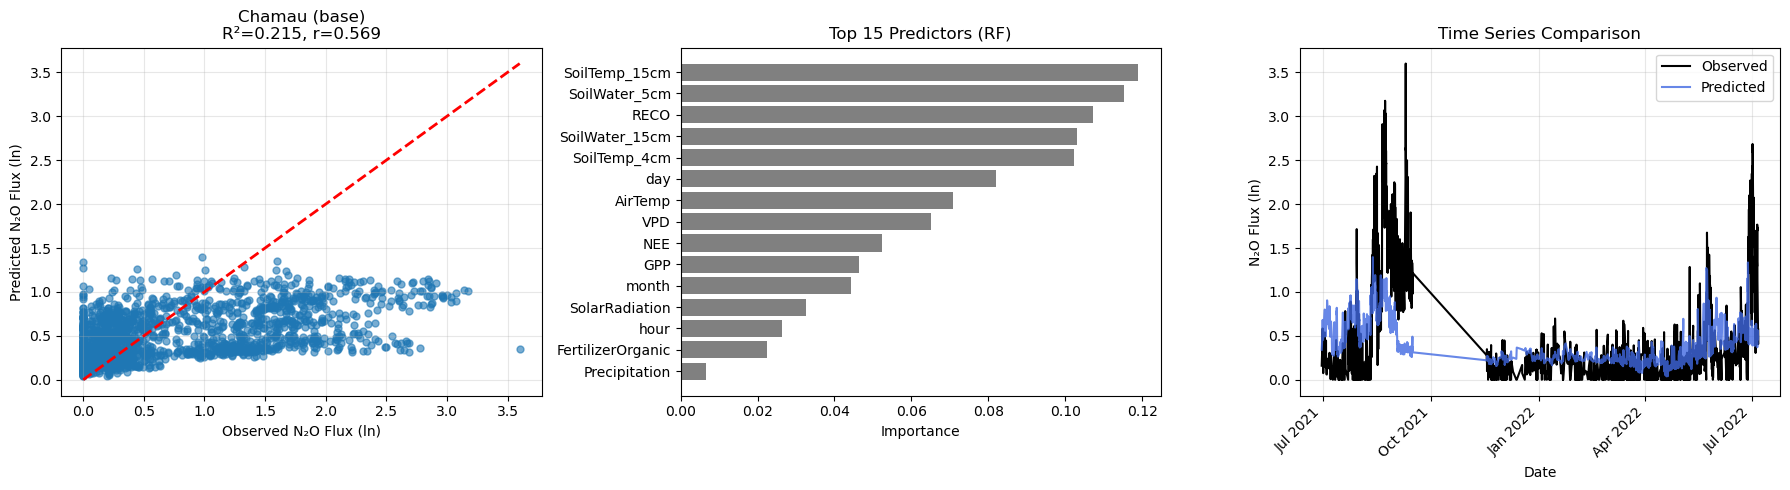


--- Chamau | predictors=augmented_lag ---
Chamau missing 45 predictors: ['AirTemp_lag1d', 'AirTemp_lag3d', 'AirTemp_lag5d', 'AirTemp_lag7d', 'Fertilizer_N_kg_ha']...
Chamau (augmented_lag): dropped 1516 rows (9.6% of total) due to NaNs


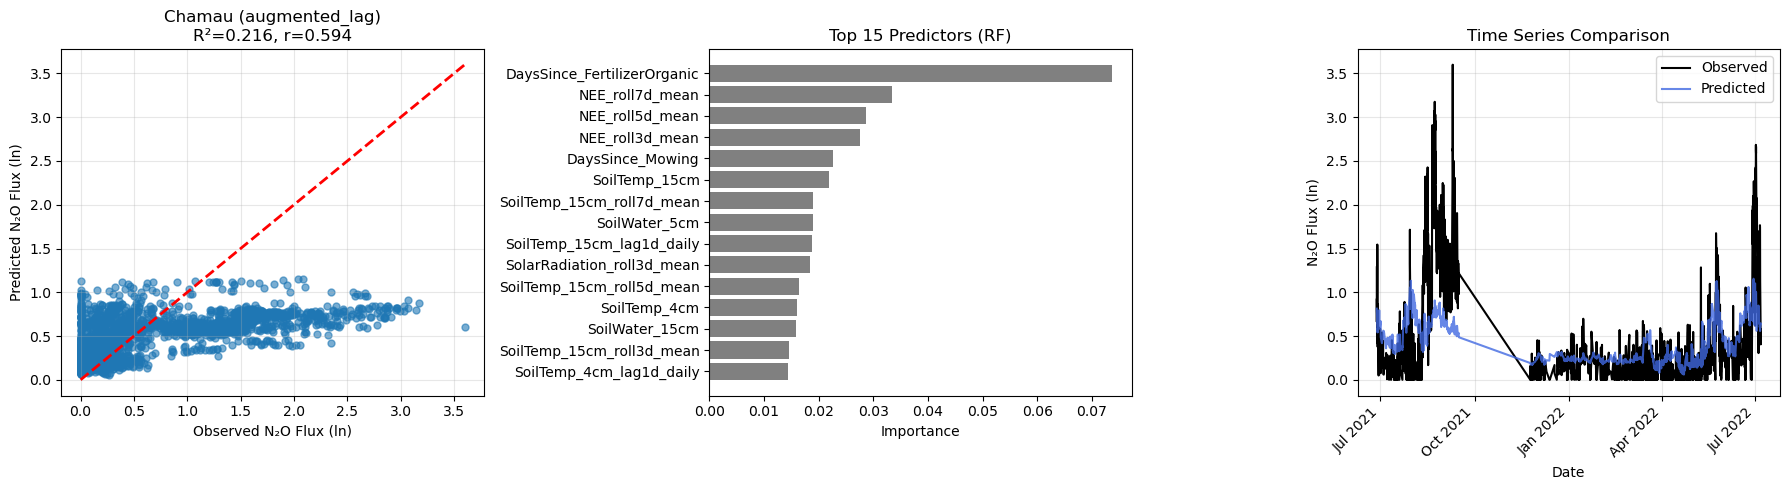

,Dataset,Predictor_Set,R²,Pearson_r,n_train,n_test
1,Chamau,augmented_lag,0.216,0.594,12185,2150
0,Chamau,base,0.215,0.569,12376,2183


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

results = []

for name, df in datasets.items():
    for set_name, predictors in predictor_sets.items():
        print(f"\n--- {name} | predictors={set_name} ---")

        try:
            # --- Filter available predictors (same logic as ElasticNet) ---
            available_predictors = [p for p in predictors if p in df.columns]

            missing = set(predictors) - set(available_predictors)
            if missing:
                print(f"{name} missing {len(missing)} predictors: "
                      f"{sorted(list(missing))[:5]}{'...' if len(missing) > 5 else ''}")

            if len(available_predictors) < 5:
                print(f"Skipping {name} ({set_name}) — too few predictors left after filtering.")
                continue

            # --- Track NaN drops before training ---
            before_drop = len(df)
            df_clean = df.dropna(subset=available_predictors + [target])
            after_drop = len(df_clean)
            dropped = before_drop - after_drop
            pct_dropped = 100 * dropped / before_drop if before_drop > 0 else 0
            print(f"{name} ({set_name}): dropped {dropped} rows "
                  f"({pct_dropped:.1f}% of total) due to NaNs")

            if after_drop < 50:
                print(f"Skipping {name} ({set_name}) — not enough data after drop.")
                continue

            # --- Train Random Forest model ---
            res = train_rf_timeseries_simple(
                df_clean, available_predictors, target,
                date_col="Timestamp", pca=False
            )

            # --- Append metrics ---
            results.append({
                "Dataset": name,
                "Predictor_Set": set_name,
                "R²": round(res["r2"], 3),
                "Pearson_r": round(res["pearson_r"], 3) if np.isfinite(res["pearson_r"]) else None,
                "n_train": res["n_train"],
                #"n_val": res["n_val"],
                "n_test": res["n_test"]
            })

            # --- Visualization section ---
            y_test = res["y_test"]
            y_pred = res["y_pred"]
            test_dates = pd.to_datetime(res["test_dates"])  # ensure datetime format
            
            # Convert to Series for alignment and plotting
            y_test_s = pd.Series(y_test, index=test_dates)
            y_pred_s = pd.Series(y_pred, index=test_dates)
            
            # Skip degenerate cases
            if np.std(y_pred) < 1e-6 or np.std(y_test) < 1e-6:
                print(f"{name} ({set_name}) → near-constant predictions or targets, skipping plot.")
                continue
            
            # --- Extract feature importance (RF only, skip PCA) ---
            model = res["model"]
            rf = model.named_steps["rf"] if "rf" in model.named_steps else model
            importances = pd.Series(rf.feature_importances_, index=available_predictors).sort_values(ascending=False)
            
            # ============================
            #   Combined 3-Panel Figure
            # ============================
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            
            # 1) Scatter Plot
            axes[0].scatter(y_test, y_pred, alpha=0.6, s=25)
            min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
            axes[0].plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
            axes[0].set_xlabel("Observed N₂O Flux (ln)")
            axes[0].set_ylabel("Predicted N₂O Flux (ln)")
            axes[0].set_title(f"{name} ({set_name})\nR²={res['r2']:.3f}, r={res['pearson_r']:.3f}")
            axes[0].grid(alpha=0.3)
            
            # 2) Top Feature Importance
            top = importances.head(15)
            axes[1].barh(top.index, top.values, color="gray")
            axes[1].invert_yaxis()
            axes[1].set_xlabel("Importance")
            axes[1].set_title("Top 15 Predictors (RF)")
            
            # 3) Time Series Comparison
            axes[2].plot(y_test_s.index, y_test_s.values, label="Observed", color="black", lw=1.5)
            axes[2].plot(y_pred_s.index, y_pred_s.values, label="Predicted", color="royalblue", lw=1.5, alpha=0.8)
            axes[2].set_xlabel("Date")
            axes[2].set_ylabel("N₂O Flux (ln)")
            axes[2].set_title("Time Series Comparison")
            axes[2].legend()
            axes[2].grid(alpha=0.3)
            
            # Time formatting
            axes[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
            axes[2].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
            plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')
            
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Skipped {name} ({set_name}) due to error: {e}")
            results.append({
                "Dataset": name,
                "Predictor_Set": set_name,
                "R²": None,
                "Pearson_r": None,
                "n_train": None,
                #"n_val": None,
                "n_test": None
            })

# --- Final summary ---
results_df = pd.DataFrame(results).sort_values(by=["R²", "Pearson_r"], ascending=False)
display(results_df)


In [9]:
datasets = {
    "Chamau Daily": chamau_daily,
    # "Chamau A Daily": chamau_daily_A,
    # "Chamau B Daily": chamau_daily_B,
    # "Aeschi Daily": aeschi_daily,
    # "Oensingen Daily 1": oensingen_daily_1,
    # "Oensingen Daily 2": oensingen_daily_2,
    # "Tanikon Daily": tanikon_daily
}


--- Chamau Daily | predictors=base ---
Chamau Daily missing 5 predictors: ['SoilTemp_30cm', 'SoilTemp_5cm', 'SoilWater_30cm', 'day', 'hour']
Chamau Daily (base): dropped 163 rows (5.6% of total) due to NaNs


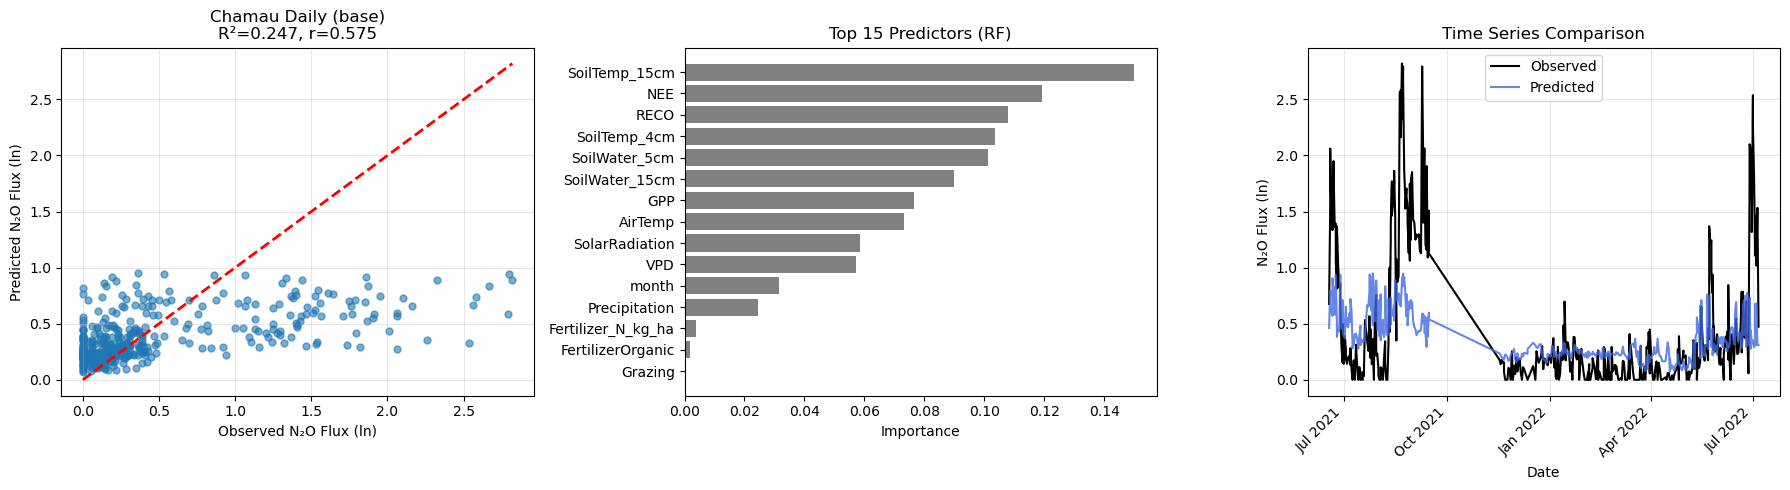


--- Chamau Daily | predictors=augmented_lag ---
Chamau Daily missing 46 predictors: ['AirTemp_lag1d_daily', 'AirTemp_lag3d_daily', 'AirTemp_lag5d_daily', 'AirTemp_lag7d_daily', 'GPP_lag1d_daily']...
Chamau Daily (augmented_lag): dropped 200 rows (6.9% of total) due to NaNs


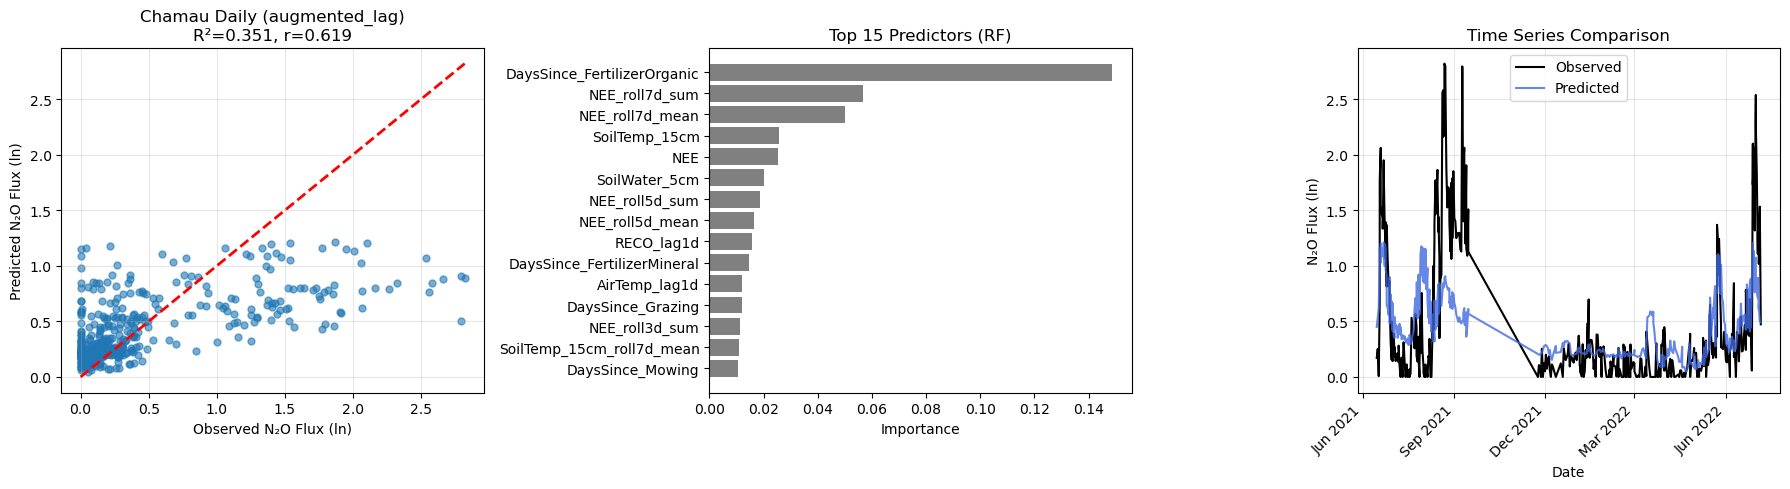

,Dataset,Predictor_Set,R²,Pearson_r,n_train,n_test
1,Chamau Daily,augmented_lag,0.351,0.619,2302,406
0,Chamau Daily,base,0.247,0.575,2334,411


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

results = []

for name, df in datasets.items():
    for set_name, predictors in predictor_sets.items():
        print(f"\n--- {name} | predictors={set_name} ---")

        try:
            # --- Filter available predictors (same logic as ElasticNet) ---
            available_predictors = [p for p in predictors if p in df.columns]

            missing = set(predictors) - set(available_predictors)
            if missing:
                print(f"{name} missing {len(missing)} predictors: "
                      f"{sorted(list(missing))[:5]}{'...' if len(missing) > 5 else ''}")

            if len(available_predictors) < 5:
                print(f"Skipping {name} ({set_name}) — too few predictors left after filtering.")
                continue

            # --- Track NaN drops before training ---
            before_drop = len(df)
            df_clean = df.dropna(subset=available_predictors + [target])
            after_drop = len(df_clean)
            dropped = before_drop - after_drop
            pct_dropped = 100 * dropped / before_drop if before_drop > 0 else 0
            print(f"{name} ({set_name}): dropped {dropped} rows "
                  f"({pct_dropped:.1f}% of total) due to NaNs")

            if after_drop < 50:
                print(f"Skipping {name} ({set_name}) — not enough data after drop.")
                continue

            # --- Train Random Forest model ---
            res = train_rf_timeseries_simple(
                df_clean, available_predictors, target,
                date_col="Date", pca=False
            )

            # --- Append metrics ---
            results.append({
                "Dataset": name,
                "Predictor_Set": set_name,
                "R²": round(res["r2"], 3),
                "Pearson_r": round(res["pearson_r"], 3) if np.isfinite(res["pearson_r"]) else None,
                "n_train": res["n_train"],
                #"n_val": res["n_val"],
                "n_test": res["n_test"]
            })

            # --- Visualization section ---
            y_test = res["y_test"]
            y_pred = res["y_pred"]
            test_dates = pd.to_datetime(res["test_dates"])  # ensure datetime format
            
            # Convert to Series for alignment and plotting
            y_test_s = pd.Series(y_test, index=test_dates)
            y_pred_s = pd.Series(y_pred, index=test_dates)
            
            # Skip degenerate cases
            if np.std(y_pred) < 1e-6 or np.std(y_test) < 1e-6:
                print(f"{name} ({set_name}) → near-constant predictions or targets, skipping plot.")
                continue
            
            # --- Extract feature importance (RF only, skip PCA) ---
            model = res["model"]
            rf = model.named_steps["rf"] if "rf" in model.named_steps else model
            importances = pd.Series(rf.feature_importances_, index=available_predictors).sort_values(ascending=False)
            
            # ============================
            #   Combined 3-Panel Figure
            # ============================
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            
            # 1) Scatter Plot
            axes[0].scatter(y_test, y_pred, alpha=0.6, s=25)
            min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
            axes[0].plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
            axes[0].set_xlabel("Observed N₂O Flux (ln)")
            axes[0].set_ylabel("Predicted N₂O Flux (ln)")
            axes[0].set_title(f"{name} ({set_name})\nR²={res['r2']:.3f}, r={res['pearson_r']:.3f}")
            axes[0].grid(alpha=0.3)
            
            # 2) Top Feature Importance
            top = importances.head(15)
            axes[1].barh(top.index, top.values, color="gray")
            axes[1].invert_yaxis()
            axes[1].set_xlabel("Importance")
            axes[1].set_title("Top 15 Predictors (RF)")
            
            # 3) Time Series Comparison
            axes[2].plot(y_test_s.index, y_test_s.values, label="Observed", color="black", lw=1.5)
            axes[2].plot(y_pred_s.index, y_pred_s.values, label="Predicted", color="royalblue", lw=1.5, alpha=0.8)
            axes[2].set_xlabel("Date")
            axes[2].set_ylabel("N₂O Flux (ln)")
            axes[2].set_title("Time Series Comparison")
            axes[2].legend()
            axes[2].grid(alpha=0.3)
            
            # Time formatting
            axes[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
            axes[2].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
            plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')
            
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Skipped {name} ({set_name}) due to error: {e}")
            results.append({
                "Dataset": name,
                "Predictor_Set": set_name,
                "R²": None,
                "Pearson_r": None,
                "n_train": None,
                #"n_val": None,
                "n_test": None
            })

# --- Final summary ---
results_df = pd.DataFrame(results).sort_values(by=["R²", "Pearson_r"], ascending=False)
display(results_df)
